# Extracting imges from CSV rows

# Importing libraries

In [1]:
import pandas as pd                           
import matplotlib.pyplot as plt
import numpy as np
import os

Loading data and its inspection

In [2]:
dt=pd.read_csv("balanced_dataset.csv")

In [3]:
dt.head()  

,L,LIL,LIR,mob_IL,mob_IR,mun_0,mup_0,phi_left,phi_right,IL_dop,...,Jsc0.56,Jsc1.00,FF0.10,FF0.18,FF0.32,FF0.56,FF1.00,label,Rseries,Rshunt
0,4.756080e-07,6.714516e-08,7.831238e-08,1.764617e-06,1.929540e-06,0.023665,0.000263,0.149744,0.146421,0.000000e+00,...,-120.2314,-213.8050,0.8772,0.8603,0.8301,0.7774,0.6875,0.0,0.001271,82.501705
1,5.178923e-07,4.550593e-08,2.642101e-08,8.084384e-07,5.718695e-07,0.000620,0.004714,0.075946,0.189856,0.000000e+00,...,-119.0695,-211.7389,0.7832,0.8294,0.8524,0.8607,0.8585,0.0,0.000007,0.861074
2,7.057012e-07,6.553554e-08,2.005537e-08,1.385142e-06,4.456697e-08,0.041227,0.000380,0.190847,0.156345,0.000000e+00,...,-118.8729,-211.3892,0.8695,0.8602,0.8447,0.8230,0.7949,0.0,0.000004,14.230269
3,5.354729e-07,7.125576e-08,4.355821e-08,1.625577e-07,3.824103e-05,0.004361,0.003093,0.196598,0.013716,-2.939039e+21,...,-119.0742,-211.7471,0.8521,0.8454,0.8310,0.8098,0.7817,0.0,0.000002,5.748305
4,7.117131e-07,6.063517e-08,1.034151e-08,3.596491e-07,4.076543e-07,0.014608,0.025273,0.125465,0.023600,0.000000e+00,...,-118.5499,-210.8148,0.8864,0.8820,0.8728,0.8572,0.8322,0.0,0.000141,28.374951


# Feature Engineering

In [4]:
dt[dt['label'] ==2 ]`

,L,LIL,LIR,mob_IL,mob_IR,mun_0,mup_0,phi_left,phi_right,IL_dop,...,Jsc0.56,Jsc1.00,FF0.10,FF0.18,FF0.32,FF0.56,FF1.00,label,Rseries,Rshunt
1646994,6.642261e-07,4.191354e-08,4.053347e-08,1.941648e-05,3.522753e-08,0.000798,0.000085,0.116585,0.012744,-1.274808e+21,...,-118.2819,-210.3101,0.7864,0.8028,0.8044,0.7927,0.7659,2.0,0.000181,1.485889
1646995,5.266986e-07,9.117831e-08,9.764625e-08,2.340148e-06,4.007737e-05,0.008106,0.011467,0.084887,0.026022,-5.423080e+22,...,-116.3126,-206.8342,0.6179,0.6492,0.6678,0.6789,0.6852,2.0,0.000048,0.881777
1646996,5.215786e-07,1.295464e-08,8.926432e-08,1.611772e-05,4.907076e-06,0.027855,0.000289,0.146703,0.096119,0.000000e+00,...,-119.6027,-212.6866,0.7720,0.8157,0.8376,0.8449,0.8407,2.0,0.000102,0.796926
1646997,5.427809e-07,5.272052e-08,6.858581e-08,3.239620e-08,1.992603e-06,0.000118,0.000123,0.009916,0.038040,0.000000e+00,...,-119.5893,-212.6093,0.6429,0.6839,0.6914,0.6734,0.6319,2.0,0.000218,0.499531
1646998,6.076951e-07,1.059597e-08,6.604982e-08,5.211093e-05,2.431783e-06,0.000193,0.002013,0.047102,0.015480,0.000000e+00,...,-120.8675,-213.4068,0.6854,0.6505,0.5899,0.4913,0.3575,2.0,0.002898,93.097922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2470486,6.034191e-07,9.241848e-08,5.907612e-08,1.226114e-06,5.061922e-06,0.000092,0.034190,0.042604,0.150102,-5.022983e+22,...,-121.6561,-216.3364,0.7738,0.7794,0.7814,0.7811,0.7789,2.0,0.000002,4.027032
2470487,5.478156e-07,4.384767e-08,4.360344e-08,8.777629e-08,3.109383e-07,0.000052,0.000503,0.089462,0.033246,0.000000e+00,...,-120.2678,-213.8607,0.7121,0.7633,0.7817,0.7745,0.7424,2.0,0.000271,0.583555
2470488,7.054312e-07,5.851619e-08,6.985941e-08,1.503810e-07,7.901860e-07,0.004786,0.000872,0.164569,0.105175,0.000000e+00,...,-120.9598,-215.0934,0.7529,0.7336,0.7095,0.6793,0.6411,2.0,0.000000,1000.000000
2470489,7.186528e-07,3.722546e-08,4.939888e-08,1.078600e-07,2.749568e-08,0.044119,0.035382,0.107600,0.026460,0.000000e+00,...,-122.2122,-217.3275,0.7010,0.7377,0.7410,0.7191,0.6754,2.0,0.000001,0.560441


In [5]:
data=dt.drop(['label','frac_recLan','Voc0.10', 'Voc0.18',
       'Voc0.32', 'Voc0.56'],axis=1)


In [6]:
data.columns

Index(['L', 'LIL', 'LIR', 'mob_IL', 'mob_IR', 'mun_0', 'mup_0', 'phi_left',
       'phi_right', 'IL_dop', 'IR_dop', 'Lang_pre', 'St_L', 'St_R', 'Etrap',
       'Cn', 'Cp', 'GB_tr', 'num_GBs', 'Gmax', 'n', 'R2w', 'aplhaw',
       'alphaR2w', 'frac_recSRH_bulk', 'frac_recSRH_l', 'frac_recSRH_r',
       'doping_left', 'doping_right', 'Voc1.00', 'Jsc0.10', 'Jsc0.18',
       'Jsc0.32', 'Jsc0.56', 'Jsc1.00', 'FF0.10', 'FF0.18', 'FF0.32', 'FF0.56',
       'FF1.00', 'Rseries', 'Rshunt'],
      dtype='object')

In [7]:
x=dt.drop(['label','frac_recLan','Voc0.10', 'Voc0.18','Voc0.32', 'Voc0.56'],axis=1)
y=dt.iloc[:,45:46]

In [8]:
x=x.values
y=y.values
y

array([[0.],
       [0.],
       [0.],
       ...,
       [2.],
       [2.],
       [2.]])

In [9]:
inputcol=['L', 'LIL', 'LIR', 'mob_IL', 'mob_IR', 'mun_0', 'mup_0', 'phi_left',
       'phi_right', 'IL_dop', 'IR_dop', 'Lang_pre', 'St_L', 'St_R', 'Etrap',
       'Cn', 'Cp', 'GB_tr', 'num_GBs', 'Gmax', 'n', 'R2w', 'aplhaw',
       'alphaR2w', 'frac_recSRH_bulk', 'frac_recSRH_l', 'frac_recSRH_r',
       'doping_left', 'doping_right', 'Voc1.00', 'Jsc0.10', 'Jsc0.18',
       'Jsc0.32', 'Jsc0.56', 'Jsc1.00', 'FF0.10', 'FF0.18', 'FF0.32', 'FF0.56',
       'FF1.00', 'Rseries', 'Rshunt']
outputcol='label'
#x=data[inputcol].values
#y=data[outputcol].values

In [10]:
data.head()

,L,LIL,LIR,mob_IL,mob_IR,mun_0,mup_0,phi_left,phi_right,IL_dop,...,Jsc0.32,Jsc0.56,Jsc1.00,FF0.10,FF0.18,FF0.32,FF0.56,FF1.00,Rseries,Rshunt
0,4.756080e-07,6.714516e-08,7.831238e-08,1.764617e-06,1.929540e-06,0.023665,0.000263,0.149744,0.146421,0.000000e+00,...,-67.6111,-120.2314,-213.8050,0.8772,0.8603,0.8301,0.7774,0.6875,0.001271,82.501705
1,5.178923e-07,4.550593e-08,2.642101e-08,8.084384e-07,5.718695e-07,0.000620,0.004714,0.075946,0.189856,0.000000e+00,...,-66.9577,-119.0695,-211.7389,0.7832,0.8294,0.8524,0.8607,0.8585,0.000007,0.861074
2,7.057012e-07,6.553554e-08,2.005537e-08,1.385142e-06,4.456697e-08,0.041227,0.000380,0.190847,0.156345,0.000000e+00,...,-66.8471,-118.8729,-211.3892,0.8695,0.8602,0.8447,0.8230,0.7949,0.000004,14.230269
3,5.354729e-07,7.125576e-08,4.355821e-08,1.625577e-07,3.824103e-05,0.004361,0.003093,0.196598,0.013716,-2.939039e+21,...,-66.9603,-119.0742,-211.7471,0.8521,0.8454,0.8310,0.8098,0.7817,0.000002,5.748305
4,7.117131e-07,6.063517e-08,1.034151e-08,3.596491e-07,4.076543e-07,0.014608,0.025273,0.125465,0.023600,0.000000e+00,...,-66.6655,-118.5499,-210.8148,0.8864,0.8820,0.8728,0.8572,0.8322,0.000141,28.374951


# correalation matrix of features

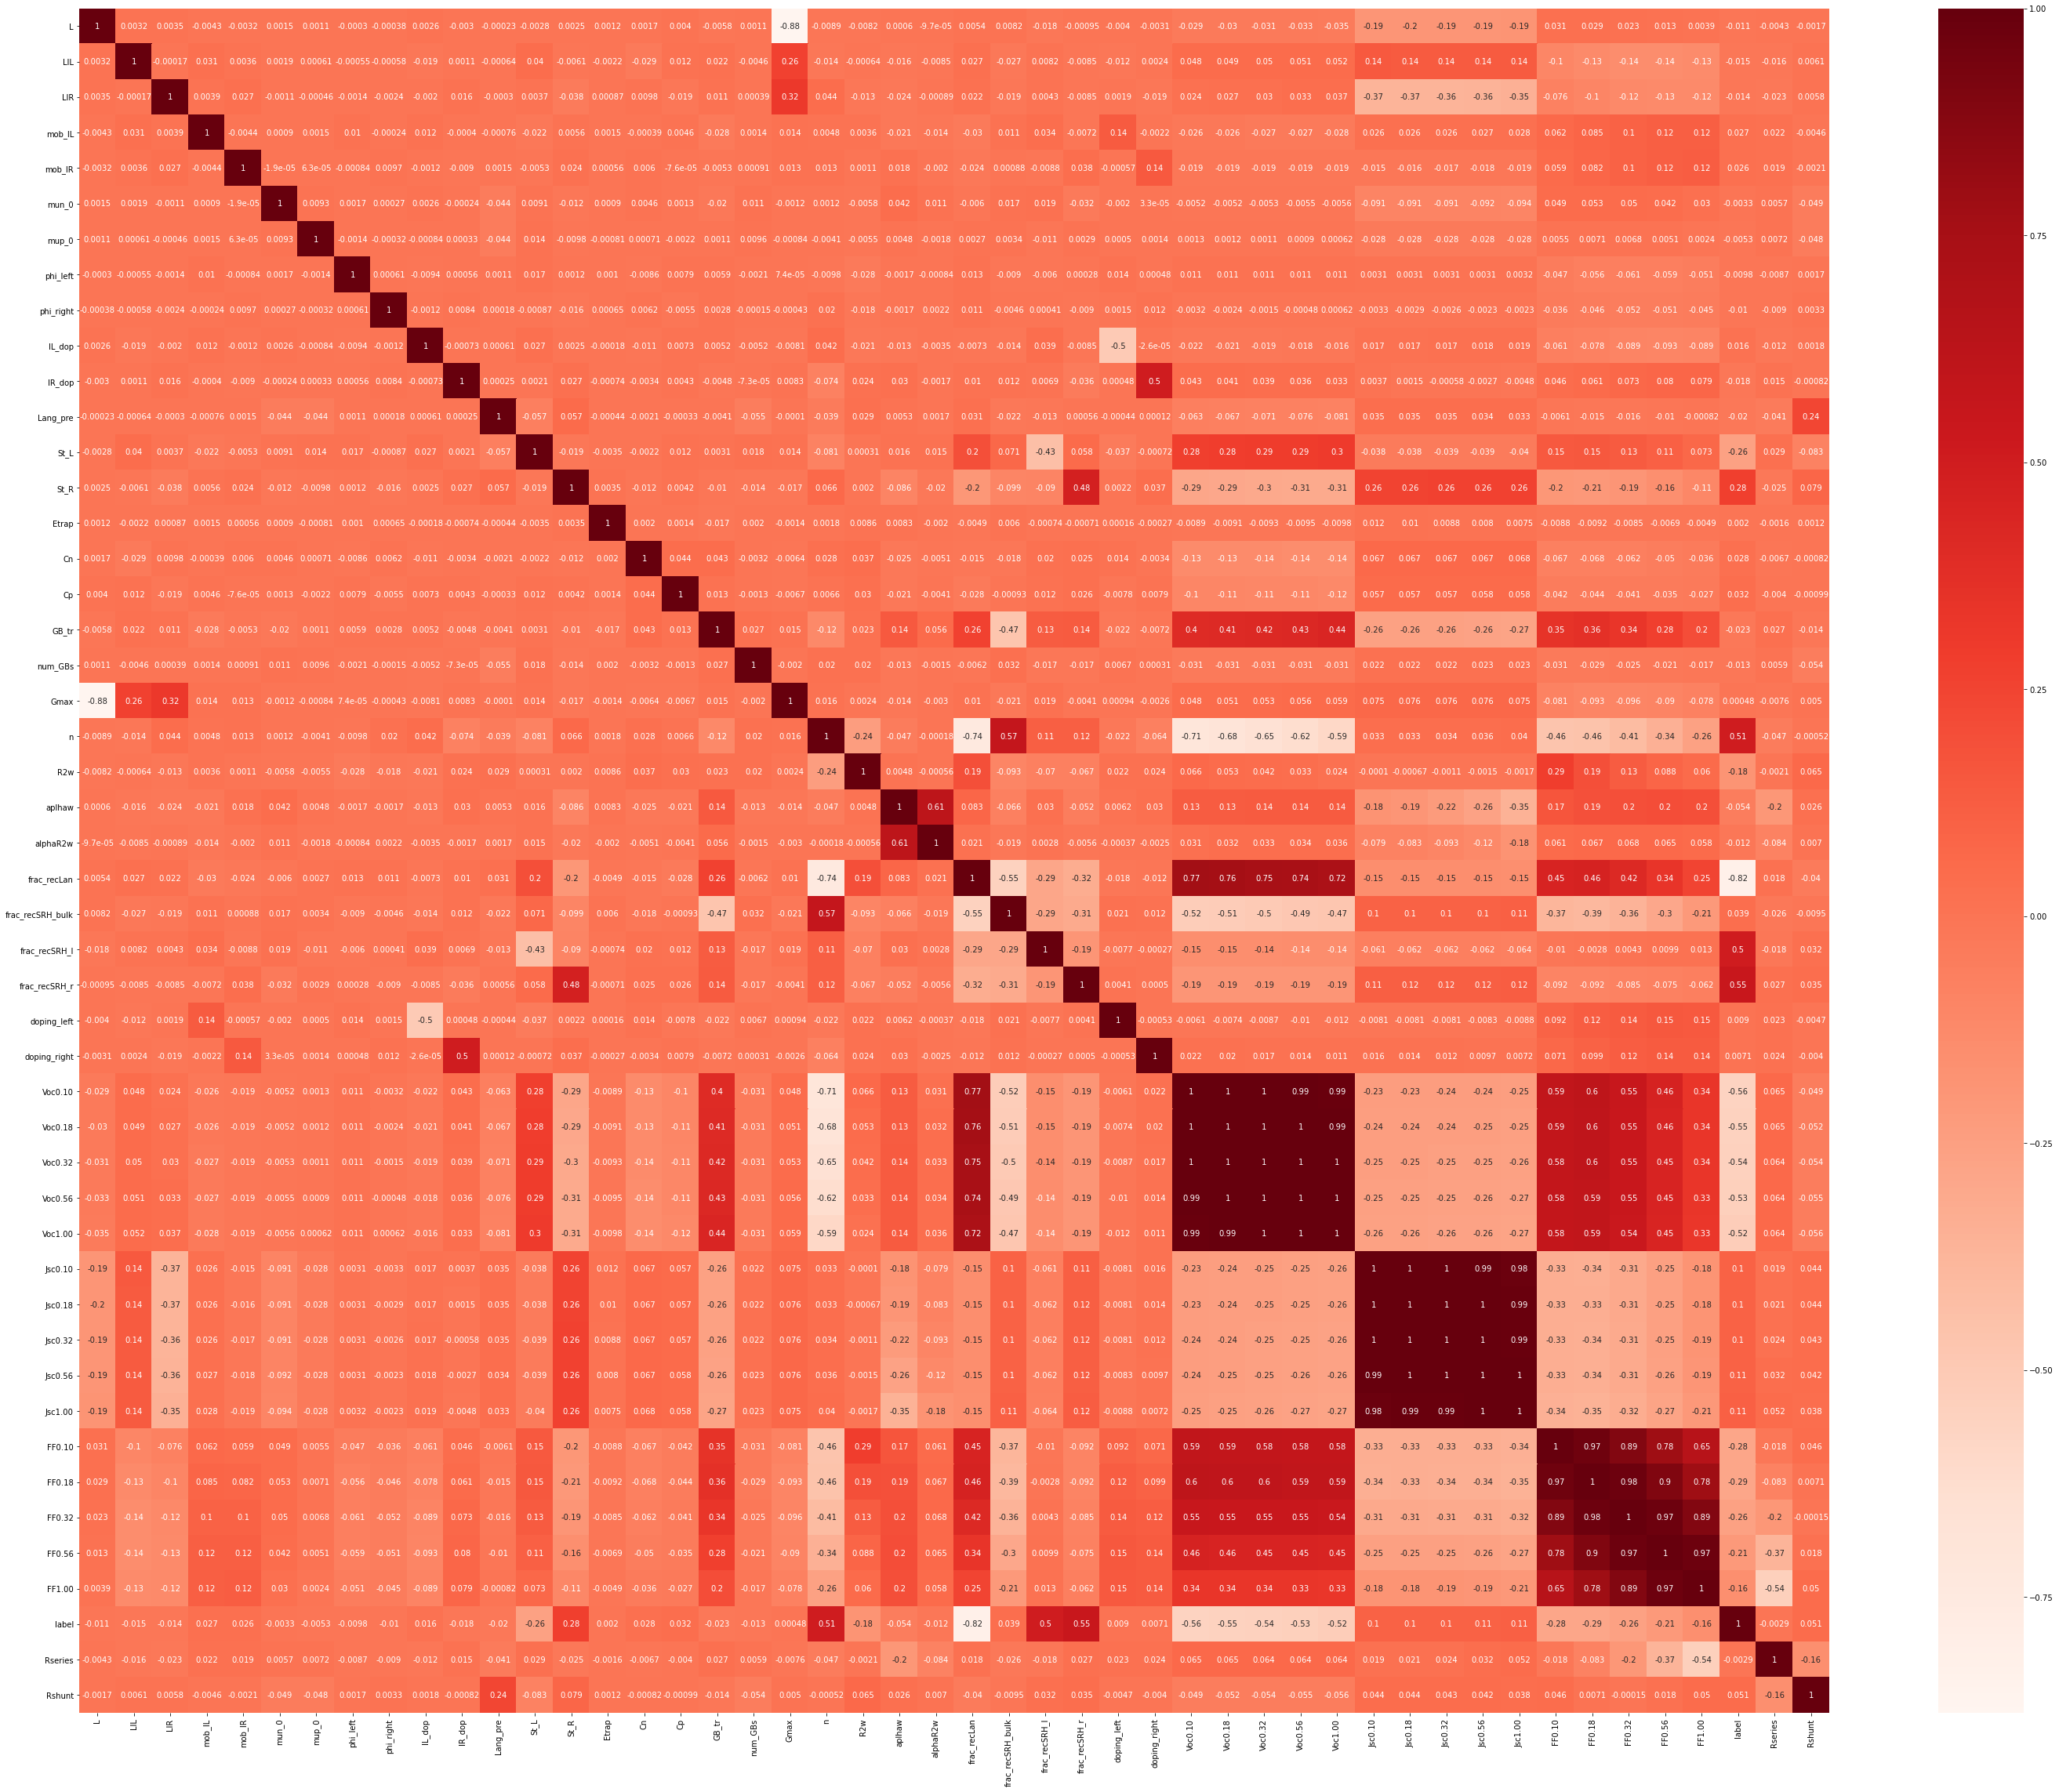

In [13]:
import seaborn as sns
plt.figure(figsize=(50,40))
cor = dt.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.01, random_state=12)

In [11]:
x_train

array([[5.97104352e-07, 9.59953415e-08, 5.40298647e-08, ...,
        6.72500000e-01, 1.05360717e-06, 1.18374167e+01],
       [6.47647158e-07, 9.40059799e-08, 6.68303682e-08, ...,
        3.94100000e-01, 1.72752118e-04, 1.67141228e+00],
       [6.84921831e-07, 3.00685787e-08, 9.94399443e-08, ...,
        8.75700000e-01, 7.61544922e-06, 5.12039548e-01],
       ...,
       [5.46089550e-07, 1.01143149e-08, 2.90679308e-08, ...,
        7.73000000e-01, 1.09934954e-04, 6.75279476e-01],
       [6.38453621e-07, 1.52508395e-08, 4.45320240e-08, ...,
        6.22900000e-01, 0.00000000e+00, 1.00000000e+03],
       [5.05684576e-07, 1.55963672e-08, 2.51871843e-08, ...,
        6.98800000e-01, 3.05304149e-06, 6.34212737e-01]])

In [11]:
x_train.shape

(2445786, 42)

In [12]:
y_train[4]

array([0.])

In [13]:
l=len(x_train)
l

2445786

In [17]:
len(x_test)

24705

In [14]:
%matplotlib inline      
import matplotlib.pyplot as plt
import cv2

# converting rows into images and saving

In [19]:
for i in range (0,len(x_test)):                                             #run this cell
    label = y_test[i]
    print(i)
    if label == 0:
        image = (x_test[i].reshape([7,6])*255.).astype(np.uint8)
        image = cv2.resize(image,(100,100),interpolation=cv2.INTER_AREA)
        script_dir = os.path.dirname('C:\\Users\\Wahid Hussain\\Desktop\\test pervo csv_img\\')
        results_dir = os.path.join(script_dir, 'label0\\')
        sample_file_name ="sample_no"+str(i)+".png" 
        #plt.title('Sample: %d  Label: %d' % (i, label))
        #plt.imshow(image, cmap=plt.get_cmap('gray_r'))
        cv2.imwrite(results_dir + sample_file_name, image)
    elif label == 1:
        image = (x_test[i].reshape([7,6])*255.).astype(np.uint8)
        image = cv2.resize(image,(100,100),interpolation=cv2.INTER_AREA)
        script_dir = os.path.dirname('C:\\Users\\Wahid Hussain\\Desktop\\test pervo csv_img\\')
        results_dir = os.path.join(script_dir, 'label1\\')
        sample_file_name ="sample_no"+str(i)+".png"  
        #plt.title('Sample: %d  Label: %d' % (i, label))
        #plt.imshow(image, cmap=plt.get_cmap('gray_r'))
        cv2.imwrite(results_dir + sample_file_name, image)
    elif label == 2:
        image = (x_test[i].reshape([7,6])*255.).astype(np.uint8)
        image = cv2.resize(image,(100,100),interpolation=cv2.INTER_AREA)
        script_dir = os.path.dirname('C:\\Users\\Wahid Hussain\\Desktop\\test pervo csv_img\\')
        results_dir = os.path.join(script_dir, 'label2\\')
        sample_file_name ="sample_no"+str(i)+".png" 
        #plt.title('Sample: %d  Label: %d' % (i, label))
        #plt.imshow(image, cmap=plt.get_cmap('gray_r'))
        cv2.imwrite(results_dir + sample_file_name,image)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102
2103
2104
2105
2106
2107
2108
2109
2110
2111
2112
2113
2114
2115
2116
2117
2118
2119
2120
2121
2122
2123
2124
2125
2126
2127
2128
2129
2130
2131
2132
2133
2134
2135
2136
2137
2138
2139
2140
2141
2142
2143
2144
2145
2146
2147
2148
2149
2150
2151
2152
2153
2154
2155
2156
2157
2158
2159
2160
2161
2162
2163
2164
2165
2166
2167
2168
2169
2170
2171
2172
2173
2174
2175
2176
2177
2178
2179
2180
2181
2182
2183
2184
2185
2186
2187
2188
2189
2190
2191
2192
2193
2194
2195
2196
2197
2198
2199
2200
2201
2202
2203
2204
2205
2206
2207
2208
2209
2210
2211
2212
2213
2214
2215


3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720
3721
3722
3723
3724
3725
3726
3727
3728
3729
3730
3731
3732
3733
3734
3735
3736
3737
3738
3739
3740
3741
3742
3743
3744
3745
3746
3747
3748
3749
3750
3751
3752
3753
3754
3755
3756
3757
3758
3759
3760
3761
3762
3763
3764
3765
3766
3767
3768
3769
3770
3771
3772
3773
3774
3775
3776
3777
3778
3779
3780
3781
3782
3783
3784
3785
3786
3787
3788
3789
3790
3791
3792
3793
3794
3795
3796
3797
3798
3799
3800
3801
3802
3803
3804
3805
3806
3807
3808
3809
3810
3811
3812
3813
3814
3815
3816
3817
3818
3819
3820
3821
3822
3823
3824
3825
3826
3827
3828
3829
3830
3831
3832
3833
3834
3835
3836
3837
3838
3839
3840
3841
3842
3843
3844
3845
3846
3847
3848
3849
3850
3851
3852
3853
3854
3855
3856
3857
3858
3859
3860
3861
3862
3863
3864
3865
3866
3867
3868
3869
3870
3871
3872
3873
3874
3875
3876
3877
3878
3879
3880
3881
3882
3883
3884
3885
3886
3887
3888
3889
3890
3891
3892
3893
3894
3895
3896
3897
3898
3899


5506
5507
5508
5509
5510
5511
5512
5513
5514
5515
5516
5517
5518
5519
5520
5521
5522
5523
5524
5525
5526
5527
5528
5529
5530
5531
5532
5533
5534
5535
5536
5537
5538
5539
5540
5541
5542
5543
5544
5545
5546
5547
5548
5549
5550
5551
5552
5553
5554
5555
5556
5557
5558
5559
5560
5561
5562
5563
5564
5565
5566
5567
5568
5569
5570
5571
5572
5573
5574
5575
5576
5577
5578
5579
5580
5581
5582
5583
5584
5585
5586
5587
5588
5589
5590
5591
5592
5593
5594
5595
5596
5597
5598
5599
5600
5601
5602
5603
5604
5605
5606
5607
5608
5609
5610
5611
5612
5613
5614
5615
5616
5617
5618
5619
5620
5621
5622
5623
5624
5625
5626
5627
5628
5629
5630
5631
5632
5633
5634
5635
5636
5637
5638
5639
5640
5641
5642
5643
5644
5645
5646
5647
5648
5649
5650
5651
5652
5653
5654
5655
5656
5657
5658
5659
5660
5661
5662
5663
5664
5665
5666
5667
5668
5669
5670
5671
5672
5673
5674
5675
5676
5677
5678
5679
5680
5681
5682
5683
5684
5685
5686
5687
5688
5689
5690
5691
5692
5693
5694
5695
5696
5697
5698
5699
5700
5701
5702
5703
5704
5705


7192
7193
7194
7195
7196
7197
7198
7199
7200
7201
7202
7203
7204
7205
7206
7207
7208
7209
7210
7211
7212
7213
7214
7215
7216
7217
7218
7219
7220
7221
7222
7223
7224
7225
7226
7227
7228
7229
7230
7231
7232
7233
7234
7235
7236
7237
7238
7239
7240
7241
7242
7243
7244
7245
7246
7247
7248
7249
7250
7251
7252
7253
7254
7255
7256
7257
7258
7259
7260
7261
7262
7263
7264
7265
7266
7267
7268
7269
7270
7271
7272
7273
7274
7275
7276
7277
7278
7279
7280
7281
7282
7283
7284
7285
7286
7287
7288
7289
7290
7291
7292
7293
7294
7295
7296
7297
7298
7299
7300
7301
7302
7303
7304
7305
7306
7307
7308
7309
7310
7311
7312
7313
7314
7315
7316
7317
7318
7319
7320
7321
7322
7323
7324
7325
7326
7327
7328
7329
7330
7331
7332
7333
7334
7335
7336
7337
7338
7339
7340
7341
7342
7343
7344
7345
7346
7347
7348
7349
7350
7351
7352
7353
7354
7355
7356
7357
7358
7359
7360
7361
7362
7363
7364
7365
7366
7367
7368
7369
7370
7371
7372
7373
7374
7375
7376
7377
7378
7379
7380
7381
7382
7383
7384
7385
7386
7387
7388
7389
7390
7391


8915
8916
8917
8918
8919
8920
8921
8922
8923
8924
8925
8926
8927
8928
8929
8930
8931
8932
8933
8934
8935
8936
8937
8938
8939
8940
8941
8942
8943
8944
8945
8946
8947
8948
8949
8950
8951
8952
8953
8954
8955
8956
8957
8958
8959
8960
8961
8962
8963
8964
8965
8966
8967
8968
8969
8970
8971
8972
8973
8974
8975
8976
8977
8978
8979
8980
8981
8982
8983
8984
8985
8986
8987
8988
8989
8990
8991
8992
8993
8994
8995
8996
8997
8998
8999
9000
9001
9002
9003
9004
9005
9006
9007
9008
9009
9010
9011
9012
9013
9014
9015
9016
9017
9018
9019
9020
9021
9022
9023
9024
9025
9026
9027
9028
9029
9030
9031
9032
9033
9034
9035
9036
9037
9038
9039
9040
9041
9042
9043
9044
9045
9046
9047
9048
9049
9050
9051
9052
9053
9054
9055
9056
9057
9058
9059
9060
9061
9062
9063
9064
9065
9066
9067
9068
9069
9070
9071
9072
9073
9074
9075
9076
9077
9078
9079
9080
9081
9082
9083
9084
9085
9086
9087
9088
9089
9090
9091
9092
9093
9094
9095
9096
9097
9098
9099
9100
9101
9102
9103
9104
9105
9106
9107
9108
9109
9110
9111
9112
9113
9114


10530
10531
10532
10533
10534
10535
10536
10537
10538
10539
10540
10541
10542
10543
10544
10545
10546
10547
10548
10549
10550
10551
10552
10553
10554
10555
10556
10557
10558
10559
10560
10561
10562
10563
10564
10565
10566
10567
10568
10569
10570
10571
10572
10573
10574
10575
10576
10577
10578
10579
10580
10581
10582
10583
10584
10585
10586
10587
10588
10589
10590
10591
10592
10593
10594
10595
10596
10597
10598
10599
10600
10601
10602
10603
10604
10605
10606
10607
10608
10609
10610
10611
10612
10613
10614
10615
10616
10617
10618
10619
10620
10621
10622
10623
10624
10625
10626
10627
10628
10629
10630
10631
10632
10633
10634
10635
10636
10637
10638
10639
10640
10641
10642
10643
10644
10645
10646
10647
10648
10649
10650
10651
10652
10653
10654
10655
10656
10657
10658
10659
10660
10661
10662
10663
10664
10665
10666
10667
10668
10669
10670
10671
10672
10673
10674
10675
10676
10677
10678
10679
10680
10681
10682
10683
10684
10685
10686
10687
10688
10689
10690
10691
10692
10693
10694
10695
1069

11952
11953
11954
11955
11956
11957
11958
11959
11960
11961
11962
11963
11964
11965
11966
11967
11968
11969
11970
11971
11972
11973
11974
11975
11976
11977
11978
11979
11980
11981
11982
11983
11984
11985
11986
11987
11988
11989
11990
11991
11992
11993
11994
11995
11996
11997
11998
11999
12000
12001
12002
12003
12004
12005
12006
12007
12008
12009
12010
12011
12012
12013
12014
12015
12016
12017
12018
12019
12020
12021
12022
12023
12024
12025
12026
12027
12028
12029
12030
12031
12032
12033
12034
12035
12036
12037
12038
12039
12040
12041
12042
12043
12044
12045
12046
12047
12048
12049
12050
12051
12052
12053
12054
12055
12056
12057
12058
12059
12060
12061
12062
12063
12064
12065
12066
12067
12068
12069
12070
12071
12072
12073
12074
12075
12076
12077
12078
12079
12080
12081
12082
12083
12084
12085
12086
12087
12088
12089
12090
12091
12092
12093
12094
12095
12096
12097
12098
12099
12100
12101
12102
12103
12104
12105
12106
12107
12108
12109
12110
12111
12112
12113
12114
12115
12116
12117
1211

13442
13443
13444
13445
13446
13447
13448
13449
13450
13451
13452
13453
13454
13455
13456
13457
13458
13459
13460
13461
13462
13463
13464
13465
13466
13467
13468
13469
13470
13471
13472
13473
13474
13475
13476
13477
13478
13479
13480
13481
13482
13483
13484
13485
13486
13487
13488
13489
13490
13491
13492
13493
13494
13495
13496
13497
13498
13499
13500
13501
13502
13503
13504
13505
13506
13507
13508
13509
13510
13511
13512
13513
13514
13515
13516
13517
13518
13519
13520
13521
13522
13523
13524
13525
13526
13527
13528
13529
13530
13531
13532
13533
13534
13535
13536
13537
13538
13539
13540
13541
13542
13543
13544
13545
13546
13547
13548
13549
13550
13551
13552
13553
13554
13555
13556
13557
13558
13559
13560
13561
13562
13563
13564
13565
13566
13567
13568
13569
13570
13571
13572
13573
13574
13575
13576
13577
13578
13579
13580
13581
13582
13583
13584
13585
13586
13587
13588
13589
13590
13591
13592
13593
13594
13595
13596
13597
13598
13599
13600
13601
13602
13603
13604
13605
13606
13607
1360

14877
14878
14879
14880
14881
14882
14883
14884
14885
14886
14887
14888
14889
14890
14891
14892
14893
14894
14895
14896
14897
14898
14899
14900
14901
14902
14903
14904
14905
14906
14907
14908
14909
14910
14911
14912
14913
14914
14915
14916
14917
14918
14919
14920
14921
14922
14923
14924
14925
14926
14927
14928
14929
14930
14931
14932
14933
14934
14935
14936
14937
14938
14939
14940
14941
14942
14943
14944
14945
14946
14947
14948
14949
14950
14951
14952
14953
14954
14955
14956
14957
14958
14959
14960
14961
14962
14963
14964
14965
14966
14967
14968
14969
14970
14971
14972
14973
14974
14975
14976
14977
14978
14979
14980
14981
14982
14983
14984
14985
14986
14987
14988
14989
14990
14991
14992
14993
14994
14995
14996
14997
14998
14999
15000
15001
15002
15003
15004
15005
15006
15007
15008
15009
15010
15011
15012
15013
15014
15015
15016
15017
15018
15019
15020
15021
15022
15023
15024
15025
15026
15027
15028
15029
15030
15031
15032
15033
15034
15035
15036
15037
15038
15039
15040
15041
15042
1504

16263
16264
16265
16266
16267
16268
16269
16270
16271
16272
16273
16274
16275
16276
16277
16278
16279
16280
16281
16282
16283
16284
16285
16286
16287
16288
16289
16290
16291
16292
16293
16294
16295
16296
16297
16298
16299
16300
16301
16302
16303
16304
16305
16306
16307
16308
16309
16310
16311
16312
16313
16314
16315
16316
16317
16318
16319
16320
16321
16322
16323
16324
16325
16326
16327
16328
16329
16330
16331
16332
16333
16334
16335
16336
16337
16338
16339
16340
16341
16342
16343
16344
16345
16346
16347
16348
16349
16350
16351
16352
16353
16354
16355
16356
16357
16358
16359
16360
16361
16362
16363
16364
16365
16366
16367
16368
16369
16370
16371
16372
16373
16374
16375
16376
16377
16378
16379
16380
16381
16382
16383
16384
16385
16386
16387
16388
16389
16390
16391
16392
16393
16394
16395
16396
16397
16398
16399
16400
16401
16402
16403
16404
16405
16406
16407
16408
16409
16410
16411
16412
16413
16414
16415
16416
16417
16418
16419
16420
16421
16422
16423
16424
16425
16426
16427
16428
1642

17724
17725
17726
17727
17728
17729
17730
17731
17732
17733
17734
17735
17736
17737
17738
17739
17740
17741
17742
17743
17744
17745
17746
17747
17748
17749
17750
17751
17752
17753
17754
17755
17756
17757
17758
17759
17760
17761
17762
17763
17764
17765
17766
17767
17768
17769
17770
17771
17772
17773
17774
17775
17776
17777
17778
17779
17780
17781
17782
17783
17784
17785
17786
17787
17788
17789
17790
17791
17792
17793
17794
17795
17796
17797
17798
17799
17800
17801
17802
17803
17804
17805
17806
17807
17808
17809
17810
17811
17812
17813
17814
17815
17816
17817
17818
17819
17820
17821
17822
17823
17824
17825
17826
17827
17828
17829
17830
17831
17832
17833
17834
17835
17836
17837
17838
17839
17840
17841
17842
17843
17844
17845
17846
17847
17848
17849
17850
17851
17852
17853
17854
17855
17856
17857
17858
17859
17860
17861
17862
17863
17864
17865
17866
17867
17868
17869
17870
17871
17872
17873
17874
17875
17876
17877
17878
17879
17880
17881
17882
17883
17884
17885
17886
17887
17888
17889
1789

19147
19148
19149
19150
19151
19152
19153
19154
19155
19156
19157
19158
19159
19160
19161
19162
19163
19164
19165
19166
19167
19168
19169
19170
19171
19172
19173
19174
19175
19176
19177
19178
19179
19180
19181
19182
19183
19184
19185
19186
19187
19188
19189
19190
19191
19192
19193
19194
19195
19196
19197
19198
19199
19200
19201
19202
19203
19204
19205
19206
19207
19208
19209
19210
19211
19212
19213
19214
19215
19216
19217
19218
19219
19220
19221
19222
19223
19224
19225
19226
19227
19228
19229
19230
19231
19232
19233
19234
19235
19236
19237
19238
19239
19240
19241
19242
19243
19244
19245
19246
19247
19248
19249
19250
19251
19252
19253
19254
19255
19256
19257
19258
19259
19260
19261
19262
19263
19264
19265
19266
19267
19268
19269
19270
19271
19272
19273
19274
19275
19276
19277
19278
19279
19280
19281
19282
19283
19284
19285
19286
19287
19288
19289
19290
19291
19292
19293
19294
19295
19296
19297
19298
19299
19300
19301
19302
19303
19304
19305
19306
19307
19308
19309
19310
19311
19312
1931

20651
20652
20653
20654
20655
20656
20657
20658
20659
20660
20661
20662
20663
20664
20665
20666
20667
20668
20669
20670
20671
20672
20673
20674
20675
20676
20677
20678
20679
20680
20681
20682
20683
20684
20685
20686
20687
20688
20689
20690
20691
20692
20693
20694
20695
20696
20697
20698
20699
20700
20701
20702
20703
20704
20705
20706
20707
20708
20709
20710
20711
20712
20713
20714
20715
20716
20717
20718
20719
20720
20721
20722
20723
20724
20725
20726
20727
20728
20729
20730
20731
20732
20733
20734
20735
20736
20737
20738
20739
20740
20741
20742
20743
20744
20745
20746
20747
20748
20749
20750
20751
20752
20753
20754
20755
20756
20757
20758
20759
20760
20761
20762
20763
20764
20765
20766
20767
20768
20769
20770
20771
20772
20773
20774
20775
20776
20777
20778
20779
20780
20781
20782
20783
20784
20785
20786
20787
20788
20789
20790
20791
20792
20793
20794
20795
20796
20797
20798
20799
20800
20801
20802
20803
20804
20805
20806
20807
20808
20809
20810
20811
20812
20813
20814
20815
20816
2081

22188
22189
22190
22191
22192
22193
22194
22195
22196
22197
22198
22199
22200
22201
22202
22203
22204
22205
22206
22207
22208
22209
22210
22211
22212
22213
22214
22215
22216
22217
22218
22219
22220
22221
22222
22223
22224
22225
22226
22227
22228
22229
22230
22231
22232
22233
22234
22235
22236
22237
22238
22239
22240
22241
22242
22243
22244
22245
22246
22247
22248
22249
22250
22251
22252
22253
22254
22255
22256
22257
22258
22259
22260
22261
22262
22263
22264
22265
22266
22267
22268
22269
22270
22271
22272
22273
22274
22275
22276
22277
22278
22279
22280
22281
22282
22283
22284
22285
22286
22287
22288
22289
22290
22291
22292
22293
22294
22295
22296
22297
22298
22299
22300
22301
22302
22303
22304
22305
22306
22307
22308
22309
22310
22311
22312
22313
22314
22315
22316
22317
22318
22319
22320
22321
22322
22323
22324
22325
22326
22327
22328
22329
22330
22331
22332
22333
22334
22335
22336
22337
22338
22339
22340
22341
22342
22343
22344
22345
22346
22347
22348
22349
22350
22351
22352
22353
2235

23737
23738
23739
23740
23741
23742
23743
23744
23745
23746
23747
23748
23749
23750
23751
23752
23753
23754
23755
23756
23757
23758
23759
23760
23761
23762
23763
23764
23765
23766
23767
23768
23769
23770
23771
23772
23773
23774
23775
23776
23777
23778
23779
23780
23781
23782
23783
23784
23785
23786
23787
23788
23789
23790
23791
23792
23793
23794
23795
23796
23797
23798
23799
23800
23801
23802
23803
23804
23805
23806
23807
23808
23809
23810
23811
23812
23813
23814
23815
23816
23817
23818
23819
23820
23821
23822
23823
23824
23825
23826
23827
23828
23829
23830
23831
23832
23833
23834
23835
23836
23837
23838
23839
23840
23841
23842
23843
23844
23845
23846
23847
23848
23849
23850
23851
23852
23853
23854
23855
23856
23857
23858
23859
23860
23861
23862
23863
23864
23865
23866
23867
23868
23869
23870
23871
23872
23873
23874
23875
23876
23877
23878
23879
23880
23881
23882
23883
23884
23885
23886
23887
23888
23889
23890
23891
23892
23893
23894
23895
23896
23897
23898
23899
23900
23901
23902
2390

In [50]:
image =(x_train[100].reshape([7,6])*255.).astype(np.uint8)

In [46]:
import cv2
image = cv2.resize(image,(600,600), interpolation=cv2.INTER_AREA)

In [47]:
cv2.imshow("www", image)
cv2.waitKey(0)

-1

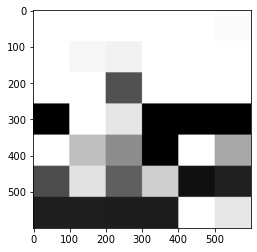

In [48]:
plt.imshow(image, cmap=plt.get_cmap('gray_r'))

In [49]:
image

array([[  0,   0,   0, ...,   4,   4,   4],
       [  0,   0,   0, ...,   4,   4,   4],
       [  0,   0,   0, ...,   4,   4,   4],
       ...,
       [224, 224, 224, ...,  24,  24,  24],
       [224, 224, 224, ...,  24,  24,  24],
       [224, 224, 224, ...,  24,  24,  24]], dtype=uint8)